In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
df = pd.read_csv(r'C:/Users/Shakil/Downloads/Compressed/news_uk_dataset.csv')
df.head()

,title,published,source,category
0,"The gift of Gabby: Gabby Logan on politics, mo...","Mon, 11 Jan 2010 08:00:00 GMT",www.independent.co.uk,Politics
1,Politics is full of slippery evasive liars: Af...,"Tue, 26 Jan 2010 08:00:00 GMT",www.dailymail.co.uk,Politics
2,BBC Comedy Blog: Mark Watson responds to Polit...,"Fri, 15 Jan 2010 08:00:00 GMT",www.bbc.co.uk,Politics
3,German politics set for shake-up as cancer for...,"Tue, 26 Jan 2010 08:00:00 GMT",www.independent.co.uk,Politics
4,The Big Question: What is the Tea Party moveme...,"Fri, 22 Jan 2010 08:00:00 GMT",www.independent.co.uk,Politics


In [3]:
# shape
df.shape

(69588, 4)

In [27]:
# different types of category
df['category'].value_counts()

category
Police           8917
Crime            6714
Travel           6479
Health           6422
Education        5195
Sports           5027
Entertainment    5018
Politics         4478
International    4408
Science          4327
Culture          3267
Environment      3197
Economy          3179
Technology       2960
Name: count, dtype: int64

In [4]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67635 entries, 0 to 69587
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      67635 non-null  object
 1   published  67635 non-null  object
 2   source     67635 non-null  object
 3   category   67635 non-null  object
dtypes: object(4)
memory usage: 2.6+ MB


C:\Users\Shakil\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


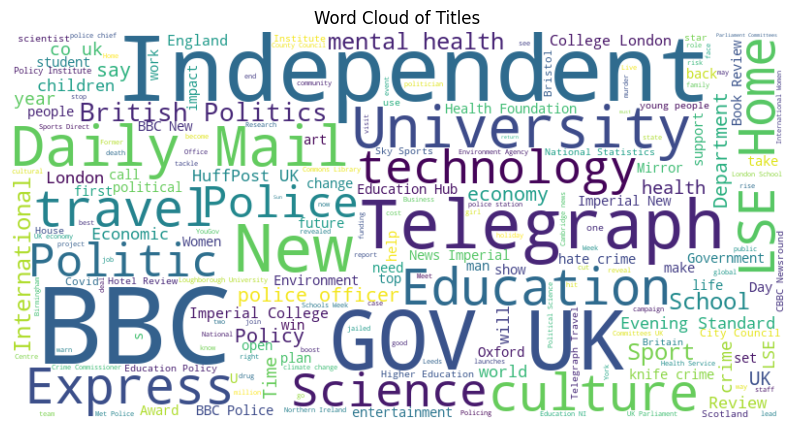

In [16]:
# Generate a word cloud of the titles
title_text = ' '.join(df['title'].tolist())
wc = WordCloud(width=800, height=400, background_color='white').generate(title_text)
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud of Titles')
plt.axis('off')
plt.show()

In [5]:
# libraries for model training and evaluation

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

In [6]:
# Encode the target labels
le = LabelEncoder()
df['encode_category'] = le.fit_transform(df['category'])

In [7]:
# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(
    df['title'], df['encode_category'], test_size=0.2,random_state=42)

In [8]:
# Initialize TFIDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english',
                       max_df=0.7)

# Transform the training and testing data
xtrain_tfidf = tfidf.fit_transform(xtrain)
xtest_tfidf = tfidf.transform(xtest)

In [9]:
# classifiers
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [14]:
# Initialize a list of models to evaluate
models = [LogisticRegression(max_iter=1000),
         MultinomialNB(),
         BernoulliNB(),
         SVC()]

# Train and evaluate each model
for model in models:
    model.fit(xtrain_tfidf, ytrain)
    ypred = model.predict(xtest_tfidf)
    # model name and accuracy score
    print(f"Model: {type(model).__name__}")
    print("Accuracy:", accuracy_score(ytest, ypred))

Model: LogisticRegression
Accuracy: 0.9026391661122201
Model: MultinomialNB
Accuracy: 0.7489465513417609
Model: BernoulliNB
Accuracy: 0.820654986323649
Model: SVC
Accuracy: 0.8902934870998743


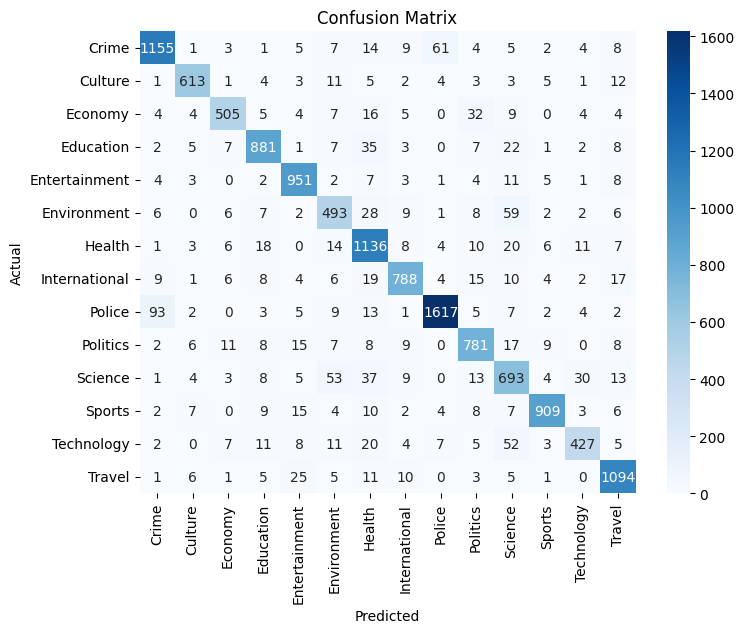

In [20]:
# Plot confusion matrix

conf_matrix = confusion_matrix(ytest, ypred)

class_labels = sorted(df['category'].unique())
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=class_labels, yticklabels=class_labels, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

### Test the model

In [26]:
sample_data = pd.DataFrame({
    'title': ["New healthcare reforms announced by the government", 
              "Latest technology trends in the automotive industry", 
              "Global warming concerns rise as temperatures soar", ],
    'source': ["www.example1.com", "www.example2.com", "www.example3.com"],
    'category': ["Politics", "Technology", "Environment"]})

# Encode the category 
sample_data['encode_category'] = le.transform(sample_data['category'])

# Transform sample data using TFIDF vectorizer
sample_data_tfidf = tfidf.transform(sample_data['title'])

# Predict the categories using trained model
sample_predictions = model.predict(sample_data_tfidf)

# Decode the encoded category
sample_predictions = le.inverse_transform(sample_predictions)

# predictions
sample_data['predicted_category'] = sample_predictions

print("Sample Data with Predictions:")
print(sample_data[['title', 'predicted_category']])

Sample Data with Predictions:
                                               title predicted_category
0  New healthcare reforms announced by the govern...             Health
1  Latest technology trends in the automotive ind...         Technology
2  Global warming concerns rise as temperatures soar        Environment
